In [1]:
!pip install q keras==2.2.4
!pip install q tensorflow==1.13.1

  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Not uninstalling keras at c:\users\dives\appdata\local\programs\python\python39\lib\site-packages, outside environment c:\just some work\rit courses\machine learning\hw4\venv
    Can't uninstall 'Keras'. No files were found to uninstall.


You should consider upgrading via the 'c:\just some work\rit courses\machine learning\hw4\venv\scripts\python.exe -m pip install --upgrade pip' command.


ERROR: Could not find a version that satisfies the requirement tensorflow==1.13.1
ERROR: No matching distribution found for tensorflow==1.13.1
You should consider upgrading via the 'c:\just some work\rit courses\machine learning\hw4\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, Activation,AveragePooling2D,Convolution2D
from keras.datasets import mnist
from keras import backend as k
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

[INFO] downloading MNIST...
Epoch 1/10
1800/1800 [==============================] - 22s 5ms/step - loss: 0.3431 - accuracy: 0.8934 - val_loss: 0.0607 - val_accuracy: 0.9805

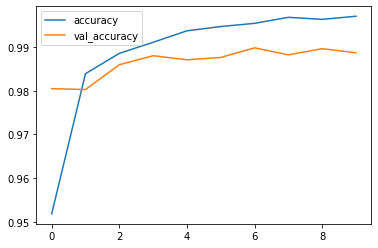

In [4]:
# Defining a LeNet Class
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        # Defining the model to be used
        ####################### TO DO ######################
        ####### Implement Lenet model    ##########
        model = Sequential()
        model.add(Conv2D(32, (3, 3), activation ='relu', input_shape=input_shape))
        model.add(MaxPooling2D((2, 2)))
        model.add(Conv2D(32, (3, 3), activation ='relu', input_shape=input_shape))
        model.add(MaxPooling2D((2, 2)))
        model.add(Flatten())
        model.add(Dense(256, activation='relu'))
        model.add(Dense(84, activation='relu'))
        model.add(Dense(10, activation='softmax'))


        
        
        
        
        
        ################ end   ################
        return model
# Hyperparameter Definition

############### TO DO ##############
####### Define your hypermeters


BATCH_SIZE= 25
EPOCHS =10
IP_SHAPE = [1,28,28]

################ end #################

k.set_image_data_format('channels_first')

#################TO DO Loading and preprocessing dataset ################
# 1. Load mnist data
# 2. convert X_train and X_test to float32 tensor
# 3. then scale the data to the range [0, 1.0]
print("[INFO] downloading MNIST...")

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]

# 4.  transform the training and testing labels into vectors in the
# range [0, classes] -- this generates a vector for each label,
# where the index of the label is set to `1` and all other entries
# to `0`; in the case of MNIST, there are 10 class labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

################ END ####################







# Building the model
model = LeNet.build(input_shape=IP_SHAPE, classes=10)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=True, validation_split=0.25)







# Accuracy Visualization

############# TO DO ########################
################# 1. evaluate the model and print test loss and accuracy  ##########
################ 2. Plot the train and val acc ############
result = model.evaluate(X_test, y_test)
print(dict(zip(model.metrics_names, result)))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()


######### end ###################